# Data

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as stats

dt10 = pd.read_csv('FFFCX_2010.csv',index_col=0,parse_dates=True)
dt20 = pd.read_csv('FFFDX_2020.csv',index_col=0,parse_dates=True)


In [2]:
ret20=dt20['Adj Close']/dt20['Adj Close'].shift(1)-1
ret10=dt10['Adj Close']/dt10['Adj Close'].shift(1)-1

In [378]:
from scipy.stats import kurtosis
print(kurtosis(ret10.values[1:],fisher=False))
print(kurtosis(ret20.values[1:],fisher=False))

4.040867550684169
6.183596164304051


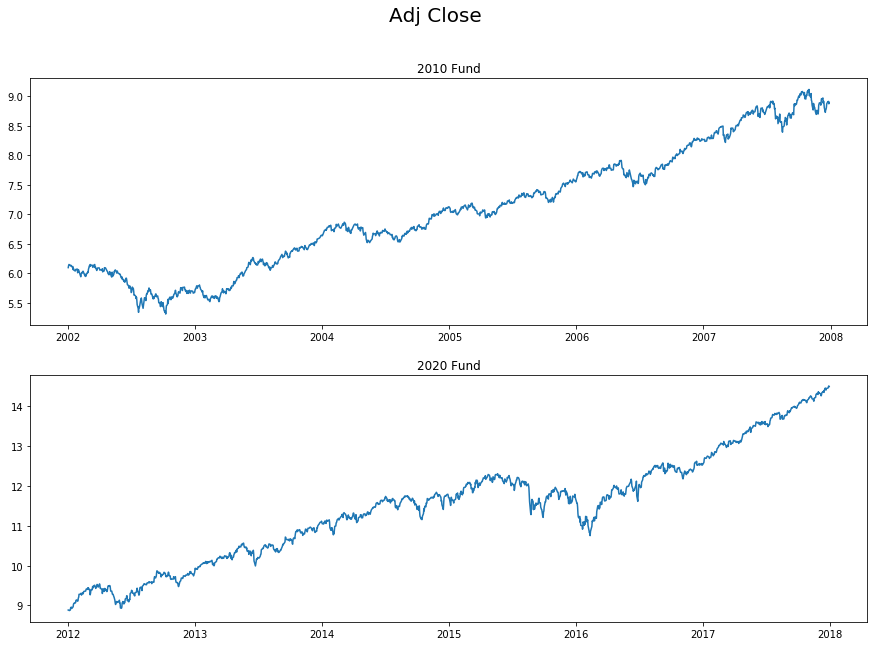

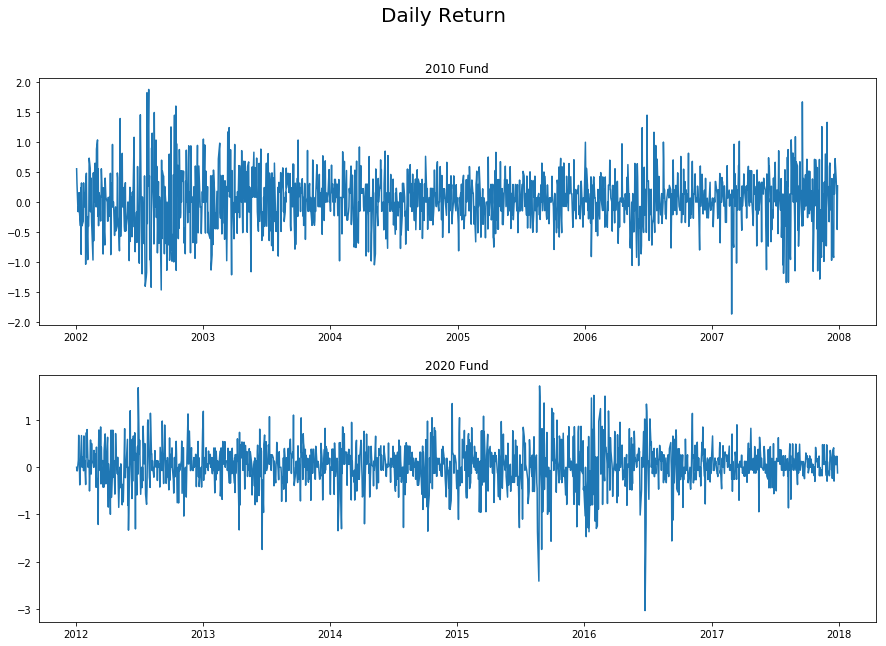

In [4]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(dt10['Adj Close'])
axs[1].plot(dt20['Adj Close'])
axs[0].set_title("2010 Fund")
axs[1].set_title("2020 Fund")
fig.set_size_inches(15, 10)
plt.suptitle("Adj Close",fontsize=20)
plt.show()

fig, axs = plt.subplots(2, 1)
axs[0].plot(ret10*100)
axs[1].plot(ret20*100)
axs[0].set_title("2010 Fund")
axs[1].set_title("2020 Fund")
fig.set_size_inches(15, 10)
plt.suptitle("Daily Return",fontsize=20)
plt.show()

In [5]:
np.sum(ret10*100<-0.7)

95

In [6]:
dt20.shape[0]

1509

# Historical

In [7]:
def historicalVaR(p):
    pFut20 = 100.*(1.+ret20[1:])
    PStar20 = np.percentile(pFut20,100.*p)
    VaR20=PStar20-100
    
    pFut10 = 100.*(1.+ret10[1:])
    PStar10 = np.percentile(pFut10,100.*p)
    VaR10=PStar10-100
    
    return VaR10, VaR20
    

In [95]:
histVaR95=historicalVaR(0.05)
histVaR99=historicalVaR(0.01)

In [370]:
print(histVaR95[0])
print(histVaR95[1])
print()
print(histVaR99[0])
print(histVaR99[1])

-0.7638554750850801
-0.7202503955828945

-1.1434434991623732
-1.3042470223499691


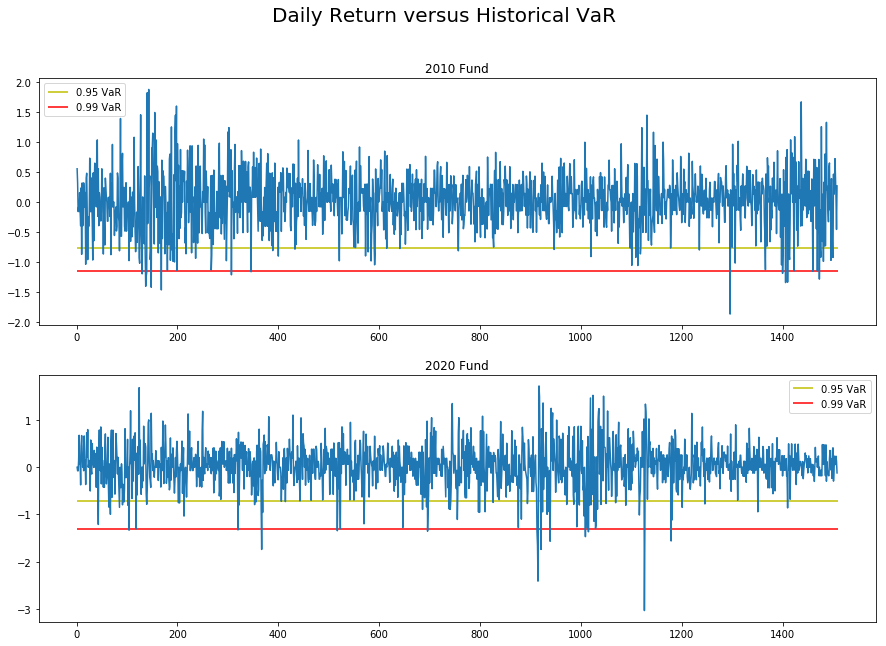

In [105]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ret10.values*100)
axs[0].hlines(histVaR95[0],xmin=0,xmax=1509,label="0.95 VaR",colors='y')
axs[0].hlines(histVaR99[0],xmin=0,xmax=1509,label="0.99 VaR",colors='red')
axs[0].legend()

axs[1].plot(ret20.values*100)
axs[1].hlines(histVaR95[1],xmin=0,xmax=1509,label="0.95 VaR",colors='y')
axs[1].hlines(histVaR99[1],xmin=0,xmax=1509,label="0.99 VaR",colors='red')
axs[1].legend()

axs[0].set_title("2010 Fund")
axs[1].set_title("2020 Fund")

fig.set_size_inches(15, 10)

plt.suptitle("Daily Return versus Historical VaR",fontsize=20)

plt.show()

# Normal

In [9]:
def normalVaR(p):
    retMean20 = np.mean(ret20)
    retStd20 = np.std(ret20)
    VaR20 = 100*stats.norm.ppf(p,loc=retMean20,scale=retStd20)
    
    retMean10 = np.mean(ret10)
    retStd10 = np.std(ret10)
    VaR10 = 100*stats.norm.ppf(p,loc=retMean10,scale=retStd10)
    
    return VaR10, VaR20

In [107]:
normalVar95=normalVaR(0.05)
normalVar99=normalVaR(0.01)

In [371]:
print(normalVar95)
print(normalVar99)

(-0.7167488194665634, -0.7104756734979017)
(-1.0245158984120837, -1.01870908228889)


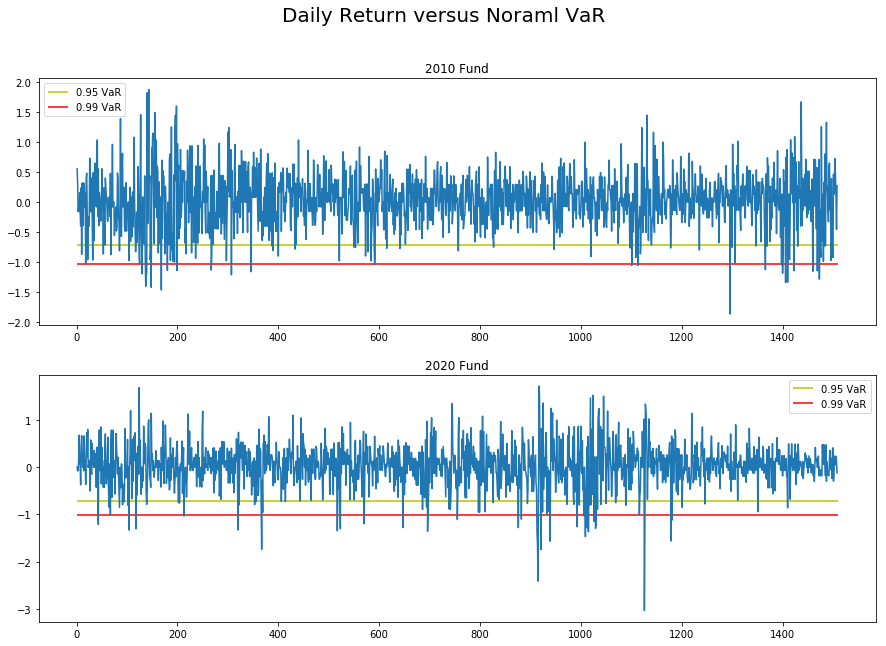

In [108]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ret10.values*100)
axs[0].hlines(normalVar95[0],xmin=0,xmax=1509,label="0.95 VaR",colors='y')
axs[0].hlines(normalVar99[0],xmin=0,xmax=1509,label="0.99 VaR",colors='red')
axs[0].legend()

axs[1].plot(ret20.values*100)
axs[1].hlines(normalVar95[1],xmin=0,xmax=1509,label="0.95 VaR",colors='y')
axs[1].hlines(normalVar99[1],xmin=0,xmax=1509,label="0.99 VaR",colors='red')
axs[1].legend()

axs[0].set_title("2010 Fund")
axs[1].set_title("2020 Fund")

fig.set_size_inches(15, 10)

plt.suptitle("Daily Return versus Noraml VaR",fontsize=20)

plt.show()

In [111]:
print(sum(ret10[1:]*100<normalVar95[0]))
print(sum(ret20[1:]*100<normalVar95[1]))
print(1509*0.05)
print("")
print(sum(ret10[1:]*100<normalVar99[0]))
print(sum(ret20[1:]*100<normalVar99[1]))
print(1509*0.01)

90
78
75.45

25
31
15.09


# Garch

Iteration:      1,   Func. Count:      6,   Neg. LLF: 826.0016107990167
Iteration:      2,   Func. Count:     17,   Neg. LLF: 825.1012907101185
Iteration:      3,   Func. Count:     27,   Neg. LLF: 824.9165390469875
Iteration:      4,   Func. Count:     34,   Neg. LLF: 823.5676155343926
Iteration:      5,   Func. Count:     41,   Neg. LLF: 822.5820156203326
Iteration:      6,   Func. Count:     49,   Neg. LLF: 822.4801785042264
Iteration:      7,   Func. Count:     56,   Neg. LLF: 821.9850995299913
Iteration:      8,   Func. Count:     63,   Neg. LLF: 821.842867997641
Iteration:      9,   Func. Count:     69,   Neg. LLF: 821.7740717343528
Iteration:     10,   Func. Count:     75,   Neg. LLF: 821.7678957313472
Iteration:     11,   Func. Count:     81,   Neg. LLF: 821.7678683027113
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 821.7678683017896
            Iterations: 11
            Function evaluations: 81
            Gradient evaluations: 11

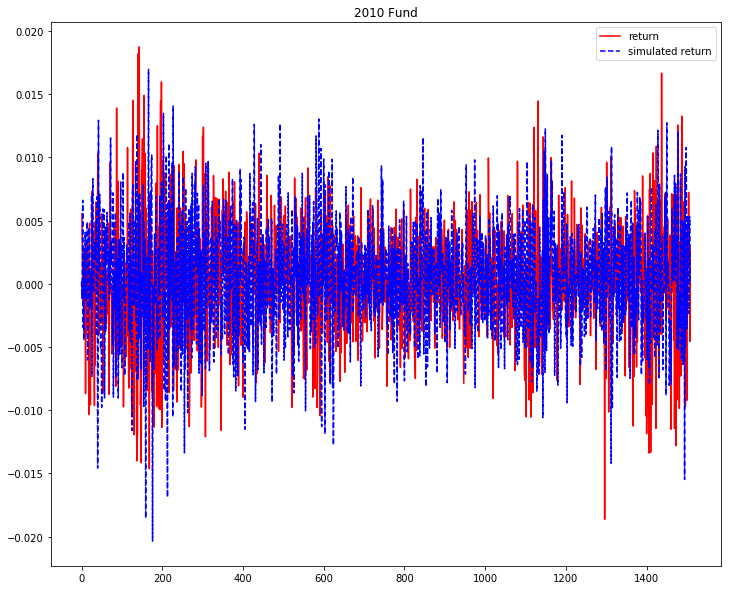

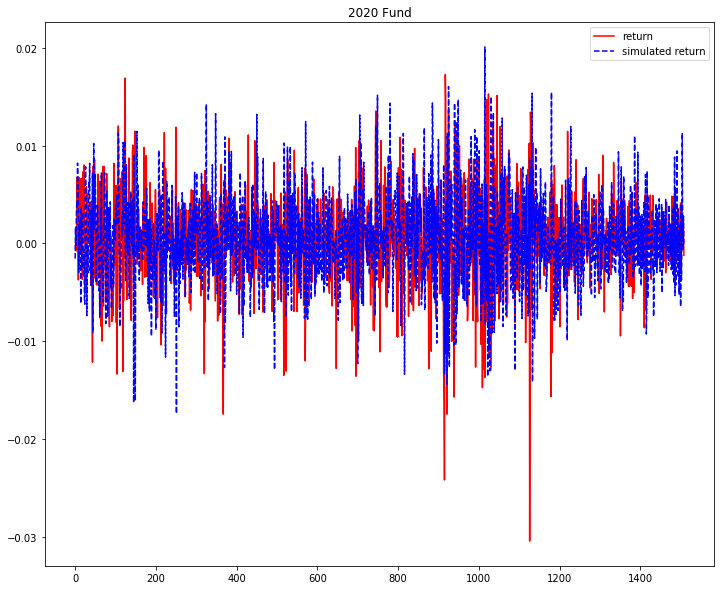

In [380]:
from arch import arch_model

garch20=arch_model(ret20[1:]*100).fit()
garch10=arch_model(ret10[1:]*100).fit()

params20=garch20.params
params10=garch10.params


sig10=np.zeros(dt10.shape[0])
sig10[0]=params10[1]/(1-params10[3])
sig10[1]=params10[1]/(1-params10[3])
for i in range(1,dt10.shape[0]-1):
    sig10[i+1]=params10[1]+sig10[i]*params10[3]+params10[2]*(ret10[i]*100-params10[0])*(ret10[i]*100-params10[0])
simret10=np.zeros(dt10.shape[0])    
for i in range(dt10.shape[0]-1):
    simret10[i]=params10[0]/100+np.sqrt(sig10[i])*np.random.normal(0,1,1)/100
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(12, 10)    
axs.plot(ret10.values,'r', label='return')
axs.plot(simret10,'b',linestyle='dashed',label='simulated return')
axs.set_title("2010 Fund")
plt.legend()
plt.show()






sig20=np.zeros(dt20.shape[0])
sig20[0]=params20[1]/(1-params20[3])
sig20[1]=params20[1]/(1-params20[3])
for i in range(1,dt20.shape[0]-1):
    sig20[i+1]=params20[1]+sig20[i]*params20[3]+params20[2]*(ret20[i]*100-params20[0])*(ret20[i]*100-params20[0])
simret20=np.zeros(dt20.shape[0])    
for i in range(dt20.shape[0]-1):
    simret20[i]=params20[0]/100+np.sqrt(sig20[i])*np.random.normal(0,1,1)/100
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(12, 10)    
axs.plot(ret20.values,'r', label='return')
axs.plot(simret20,'b',linestyle='dashed',label='simulated return')
axs.set_title("2020 Fund")
plt.legend()
plt.show()





In [24]:
VaR20=np.zeros(dt20.shape[0]) 
for i in range(dt20.shape[0]-1):
    VaR20[i]=params20[0]/100+np.sqrt(sig20[i])/100*stats.norm.ppf(0.05,loc=0,scale=1)

sum(ret20[1:]<VaR20[1:])

87

In [127]:
#np.sort(VaR20)

array([-0.02119778, -0.02043073, -0.0203539 , ..., -0.00359684,
        0.        ,  0.00043684])

In [137]:
def garchVaR(p):
    VaR20=np.zeros(dt20.shape[0]) 
    for i in range(dt20.shape[0]-1):
        VaR20[i]=params20[0]/100+np.sqrt(sig20[i])/100*stats.norm.ppf(p,loc=0,scale=1)

    VaR10=np.zeros(dt10.shape[0]) 
    for i in range(dt10.shape[0]-1):
        VaR10[i]=params10[0]/100+np.sqrt(sig10[i])/100*stats.norm.ppf(p,loc=0,scale=1)
        
    return VaR10*100, VaR20*100

In [138]:
garchVar95=garchVaR(0.05)
garchVar99=garchVaR(0.01)


In [373]:
print(np.mean(garchVar95[0][1:]))
print(np.mean(garchVar95[1][1:]))
print()
print(np.mean(garchVar99[0][1:]))
print(np.mean(garchVar99[1][1:]))

-0.677672169015511
-0.6720398768335388

-0.9726282438531666
-0.9685657617645251


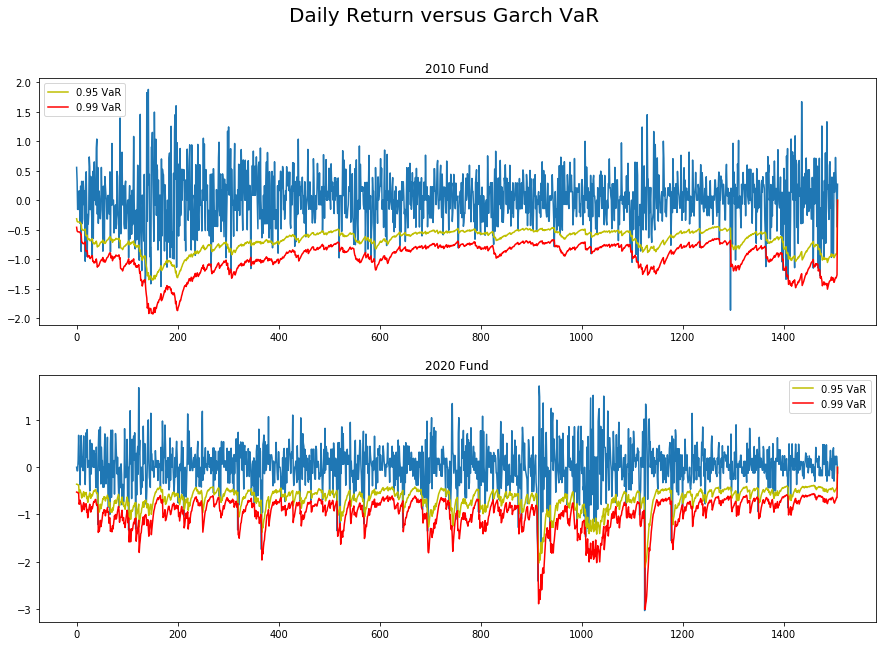

In [139]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ret10.values[1:]*100)
axs[0].plot(garchVar95[0][1:],label="0.95 VaR",color='y')
axs[0].plot(garchVar99[0][1:],label="0.99 VaR",color='red')
axs[0].legend()

axs[1].plot(ret20.values[1:]*100)
axs[1].plot(garchVar95[1][1:],label="0.95 VaR",color='y')
axs[1].plot(garchVar99[1][1:],label="0.99 VaR",color='red')
axs[1].legend()

axs[0].set_title("2010 Fund")
axs[1].set_title("2020 Fund")

fig.set_size_inches(15, 10)

plt.suptitle("Daily Return versus Garch VaR",fontsize=20)

plt.show()

In [140]:
print(sum(ret10[1:-1]*100<garchVar95[0][1:-1]))
print(sum(ret20[1:-1]*100<garchVar95[1][1:-1]))
print(1509*0.05)
print("")
print(sum(ret10[1:-1]*100<garchVar99[0][1:-1]))
print(sum(ret20[1:-1]*100<garchVar99[1][1:-1]))
print(1509*0.01)




86
86
75.45

27
31
15.09


# ARIMA

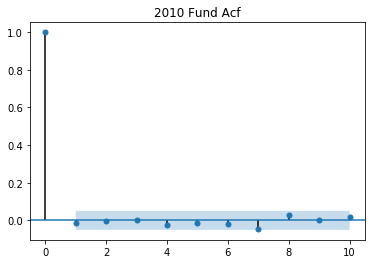

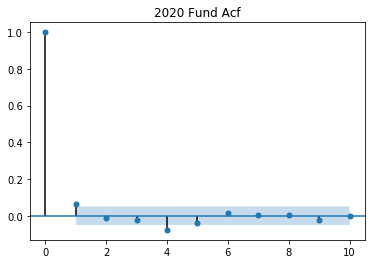

In [382]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

#plot_acf(ret10.values[1:].reshape(-1,1), lags=10)
plot_acf(ret10.values[1:].reshape(-1,1), lags=10)
plt.title("2010 Fund Acf")
plt.show()

#plot_acf(ret20.values[1:].reshape(-1,1), lags=10)
plot_acf(ret20.values[1:].reshape(-1,1), lags=10)
plt.title("2020 Fund Acf")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
reg10 = LinearRegression().fit(ret10.values[1:-1].reshape(-1, 1), ret10.values[2:].reshape(-1, 1))
reg20 = LinearRegression().fit(ret20.values[1:-1].reshape(-1, 1), ret20.values[2:].reshape(-1, 1))
yhat10=reg10.predict(ret10.values[1:-1].reshape(-1, 1))
yhat20=reg20.predict(ret20.values[1:-1].reshape(-1, 1))
sig210=np.sum(np.square(yhat10-ret10.values[2:].reshape(-1, 1)))/(ret10.values[1:-1].shape[0]-1)
sig220=np.sum(np.square(yhat20-ret20.values[2:].reshape(-1, 1)))/(ret20.values[1:-1].shape[0]-1)

In [43]:
def ArimaVaR(p):
    VaR20=yhat20+stats.norm.ppf(p,loc=0,scale=1)*np.sqrt(sig220)
    VaR10=yhat10+stats.norm.ppf(p,loc=0,scale=1)*np.sqrt(sig210)
    return VaR10*100,VaR20*100

In [144]:
arimaVar95=ArimaVaR(0.05)
arimaVar99=ArimaVaR(0.01)


In [374]:
print(np.mean(arimaVar95[0][1:]))
print(np.mean(arimaVar95[1][1:]))
print()
print(np.mean(arimaVar99[0][1:]))
print(np.mean(arimaVar99[1][1:]))

-0.717149274676109
-0.7095268471502796

-1.024939324362957
-1.0173769125108933


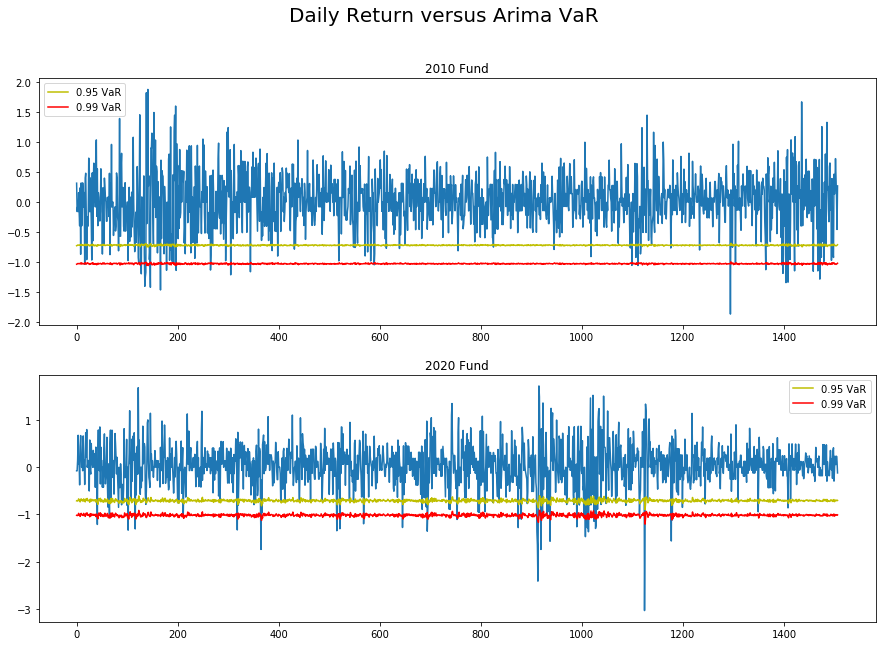

In [145]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ret10.values[2:]*100)
axs[0].plot(arimaVar95[0].flatten(),label="0.95 VaR",color='y')
axs[0].plot(arimaVar99[0].flatten(),label="0.99 VaR",color='red')
axs[0].legend()

axs[1].plot(ret20.values[2:]*100)
axs[1].plot(arimaVar95[1].flatten(),label="0.95 VaR",color='y')
axs[1].plot(arimaVar99[1].flatten(),label="0.99 VaR",color='red')
axs[1].legend()

axs[0].set_title("2010 Fund")
axs[1].set_title("2020 Fund")

fig.set_size_inches(15, 10)

plt.suptitle("Daily Return versus Arima VaR",fontsize=20)

plt.show()

In [155]:
print(sum(ret10[2:]*100<arimaVar95[0].flatten()))
print(sum(ret20[2:]*100<arimaVar95[1].flatten()))
print(1509*0.05)
print("")
print(sum(ret10[2:]*100<arimaVar99[0].flatten()))
print(sum(ret20[2:]*100<arimaVar99[1].flatten()))
print(1509*0.01)





92
77
75.45

26
29
15.09


# GPD

In [228]:
ret10exm=np.sort(ret10[1:])[:300]
ret20exm=np.sort(ret20[1:])[:300]

In [356]:
stats.pareto.fit(-ret10exm, 12, loc=0, scale=0.3)

(81.30610099869736, -0.24336102575795365, 0.2465278703274249)

In [325]:
stats.pareto.fit(-ret20exm, 12, loc=0, scale=0.05)

(69.48475579646345, -0.22957449718344247, 0.23216013442897443)

In [366]:
p=0.05
VaR1095=-stats.pareto.ppf(1-p/0.2,81.30610099869736, -0.24336102575795365, 0.2465278703274249)
VaR2095=-stats.pareto.ppf(1-p/0.2,69.48475579646345, -0.22957449718344247, 0.23216013442897443)

p=0.01
VaR1099=-stats.pareto.ppf(1-p/0.2,81.30610099869736, -0.24336102575795365, 0.2465278703274249)
VaR2099=-stats.pareto.ppf(1-p/0.2,69.48475579646345, -0.22957449718344247, 0.23216013442897443)

In [367]:
print(VaR1095)
print(VaR2095)
print()
print(VaR1099)
print(VaR2099)

-0.007406260567098644
-0.007263991320121843

-0.012419603914221755
-0.012813778704435008


In [368]:
print(sum(ret10[1:]*100<VaR1095*100))
print(sum(ret20[1:]*100<VaR2095*100))
print(1509*0.05)
print("")
print(sum(ret10[1:]*100<VaR1099*100))
print(sum(ret20[1:]*100<VaR2099*100))
print(1509*0.01)



82
75
75.45

8
18
15.09


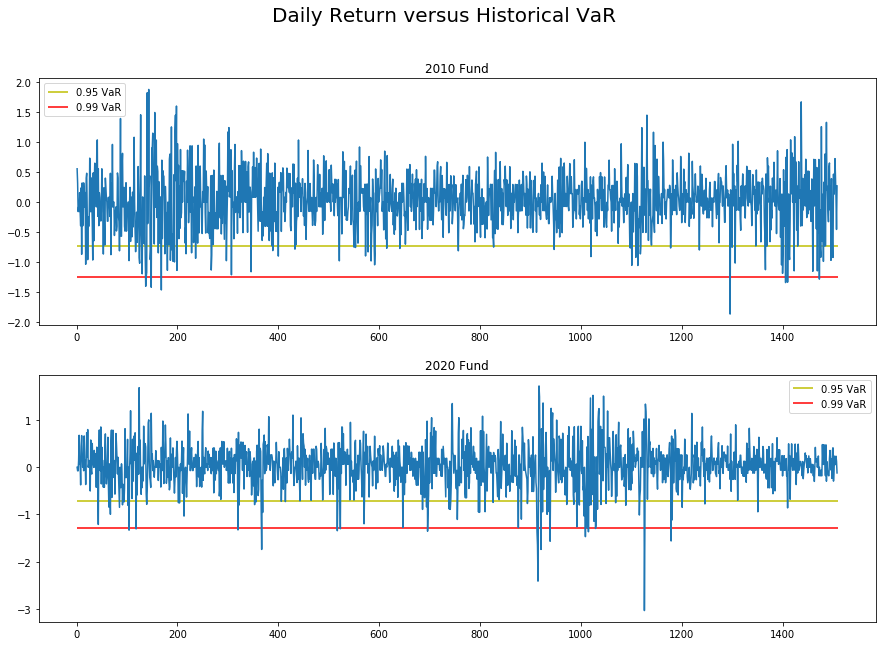

In [329]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ret10.values*100)
axs[0].hlines(VaR1095*100,xmin=0,xmax=1509,label="0.95 VaR",colors='y')
axs[0].hlines(VaR1099*100,xmin=0,xmax=1509,label="0.99 VaR",colors='red')
axs[0].legend()

axs[1].plot(ret20.values*100)
axs[1].hlines(VaR2095*100,xmin=0,xmax=1509,label="0.95 VaR",colors='y')
axs[1].hlines(VaR2099*100,xmin=0,xmax=1509,label="0.99 VaR",colors='red')
axs[1].legend()

axs[0].set_title("2010 Fund")
axs[1].set_title("2020 Fund")

fig.set_size_inches(15, 10)

plt.suptitle("Daily Return versus Historical VaR",fontsize=20)

plt.show()